# Wine Classification
## Prediction of wine quality with the use of logistic regression

In [94]:
%pylab inline

import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy.stats as stats
from IPython.core.display import display, HTML
import pandas as pd
from collections import OrderedDict
from sklearn.model_selection import train_test_split # to split in train and test set
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression  # logistic regression classifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report

def preprocess(file_name):
    results = []
    with open(file_name) as csvfile:
        wine_reader = csv.reader(csvfile, dialect="excel", delimiter=';')
        for row in wine_reader:
            results.append(row)
    name_features = results[0]
    #print(name_features)
    parsed_results = []
    for row in results[1:]:
        new_row = []
        for num in row:
            new_row.append(float(num))
        parsed_results.append(new_row)
    parsed_results = np.array(parsed_results)
    n_instances = parsed_results.shape[0]
    n_features = parsed_results.shape[1] - 1
    labels = parsed_results[:, n_features]
    instances = parsed_results[:, : n_features]
    return instances, labels

white_instances, white_labels = preprocess('winequality-white.csv')
red_instances, red_labels = preprocess('winequality-red.csv')

white_two_classes = np.array([0 if num <6 else 1 for num in white_labels])
red_two_classes = np.array([0 if num <6 else 1 for num in red_labels])

def three_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score <= 6:
            transformed.append("medium")
        else:
            transformed.append("good")
    return np.array(transformed)

white_three_classes = three_classes(white_labels)
red_three_classes = three_classes(red_labels)

def four_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score == 5:
            transformed.append("medium low")
        elif score == 6:
            transformed.append("medium high")
        else:
            transformed.append("good")
    return np.array(transformed)

white_four_classes = four_classes(white_labels)
red_four_classes = four_classes(red_labels)

Populating the interactive namespace from numpy and matplotlib


In [64]:
lr = LogisticRegression()
paramslg = {'C': np.linspace(0.1, 1, 20), 'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

def tune(params, clf, instances, labels):
    x_train, x_test, y_train, y_test = train_test_split(instances, labels)
    gs = GridSearchCV(clf, param_grid=params, cv=5)
    gs.fit(x_train, y_train)
    return gs.best_params_

par_w2 = tune(paramslg, lr, white_instances, white_two_classes)
par_w3 = tune(paramslg, lr, white_instances, white_three_classes)
par_w4 = tune(paramslg, lr, white_instances, white_four_classes)

par_r2 = tune(paramslg, lr, red_instances, red_two_classes)
par_r3 = tune(paramslg, lr, red_instances, red_three_classes)
par_r4 = tune(paramslg, lr, red_instances, red_four_classes)



In [95]:
display(HTML('<h3>Logistic Regression\'s results of tuning</h3>'))

display(HTML('<h4>White Wine</h4>'))
parameters_white = [{'Classes': '2', 'C': par_w2['C'], 'solver': par_w2['solver']},
         {'Classes': '3',  'C': par_w3['C'], 'solver': par_w3['solver']},
         {'Classes': '4', 'C': par_w4['C'], 'solver':par_w4['solver']}]
df_white = pd.DataFrame(parameters_white)
df_white = df_white[['Classes', 'C', 'solver']]
print(df_white)

display(HTML('<h4>Red Wine</h4>'))
parameters_red = [{'Classes': '2', 'C': par_r2['C'], 'solver': par_r2['solver']},
         {'Classes': '3',  'C': par_r3['C'], 'solver': par_r3['solver']},
         {'Classes': '4', 'C': par_r4['C'], 'solver':par_r4['solver']}]
df_red = pd.DataFrame(parameters_red)
df_red = df_red[['Classes', 'C', 'solver']]
print(df_red)


  Classes         C     solver
0       2  1.000000  liblinear
1       3  0.810526  newton-cg
2       4  0.952632  newton-cg


  Classes         C     solver
0       2  0.384211      lbfgs
1       3  0.289474  newton-cg
2       4  0.810526  liblinear


In [96]:
def produce_report(clf_name, clf, instances, labels):
    x_train, x_test, y_train, y_test = train_test_split(instances, labels)
    clf = clf
    preds = clf.fit(x_train, y_train).predict(x_test)
    accuracy = (accuracy_score(y_test, preds))
    display(HTML('<strong>Report</strong>:\n'))
    print(classification_report(y_test, preds), "\n")
    display(HTML('<strong>Confusion Matrix</strong>:\n'))
    print(confusion_matrix(y_test, clf.fit(x_test, y_test).predict(x_test)))
    return accuracy, y_test, preds


In [97]:
display(HTML('<h3>For White Wine: </h3>'))
accuracy_white_2, y_test_white_2, y_score_white_2 = produce_report('LR for white wine (2 classes)', 
                                       LogisticRegression(C = par_w2['C'], solver = par_w2['solver']), 
               white_instances, white_two_classes)
accuracy_white_3, y_test_white_3, y_score_white_3 = produce_report('LR for white wine (3 classes)', LogisticRegression(C = par_w3['C'], solver = par_w3['solver']), 
               white_instances, white_three_classes)
accuracy_white_4, y_test_white_4, y_score_white_4 = produce_report('LR for white wine (4 classes)', LogisticRegression(C = par_w4['C'], solver = par_w4['solver']), 
               white_instances, white_four_classes)



             precision    recall  f1-score   support

          0       0.64      0.46      0.54       400
          1       0.77      0.88      0.82       825

avg / total       0.73      0.74      0.73      1225
 



[[168 232]
 [ 85 740]]


             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        41
       good       0.59      0.31      0.41       254
     medium       0.80      0.94      0.87       930

avg / total       0.73      0.78      0.74      1225
 



/Users/Vera/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[  0   3  38]
 [  0  68 186]
 [  0  42 888]]


             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        45
       good       0.63      0.25      0.36       302
medium high       0.53      0.73      0.62       545
 medium low       0.55      0.58      0.56       333

avg / total       0.54      0.55      0.52      1225
 



[[  0   3  15  27]
 [  0 106 189   7]
 [  0  73 388  84]
 [  0   5 163 165]]


In [98]:
display(HTML('<h3>For Red Wine: </h3>'))
accuracy_red_2, y_test_red_2, y_score_red_2 = produce_report('LR for red wine (2 classes)', 
                                        LogisticRegression(C = par_r2['C'], solver = par_r2['solver']), 
                                                             red_instances, red_two_classes)
accuracy_red_3, y_test_red_3, y_score_red_3 = produce_report('LR for red wine (3 classes)', 
                                        LogisticRegression(C = par_r3['C'], solver = par_r3['solver']), 
                                                             red_instances, red_three_classes)
accuracy_red_4, y_test_red_4, y_score_red_4 = produce_report('LR for red wine (4 classes)', 
                                        LogisticRegression(C = par_r4['C'], solver = par_r4['solver']), 
                                                             red_instances, red_four_classes)

             precision    recall  f1-score   support

          0       0.74      0.70      0.72       191
          1       0.74      0.78      0.76       209

avg / total       0.74      0.74      0.74       400
 



[[140  51]
 [ 57 152]]


             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        16
       good       0.58      0.26      0.36        53
     medium       0.85      0.97      0.91       331

avg / total       0.78      0.84      0.80       400
 



/Users/Vera/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[  0   0  16]
 [  0  10  43]
 [  0   3 328]]


             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        18
       good       0.47      0.12      0.19        60
medium high       0.52      0.61      0.56       166
 medium low       0.62      0.76      0.68       156

avg / total       0.53      0.56      0.53       400
 



[[  0   0   7  11]
 [  0  19  39   2]
 [  0   8 106  52]
 [  0   1  55 100]]


In [99]:
display(HTML('<h3>Logistic Regression\'s Accuracy Scores </h3>'))

display(HTML('<h4>White Wine Accuracy</h4>'))
accuracy_w = [{'Classes': '2', 'Accuracy': accuracy_white_2},
         {'Classes': '3', 'Accuracy': accuracy_white_3},
         {'Classes': '4','Accuracy': accuracy_white_4}]
df_w_acc = pd.DataFrame(accuracy_w)
df_w_acc = df_w_acc[['Classes', 'Accuracy']]
print(df_w_acc)

display(HTML('<h4>Red Wine Accuracy</h4>'))
accuracy_red = [{'Classes': '2', 'Accuracy': accuracy_red_2},
         {'Classes': '3', 'Accuracy': accuracy_red_3},
         {'Classes': '4','Accuracy': accuracy_red_4}]
df_red_acc = pd.DataFrame(accuracy_red)
df_red_acc = df_red_acc[['Classes', 'Accuracy']]
print(df_red_acc)

  Classes  Accuracy
0       2  0.740408
1       3  0.781224
2       4  0.545306


  Classes  Accuracy
0       2    0.7425
1       3    0.8375
2       4    0.5650


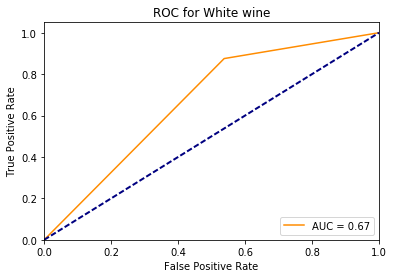

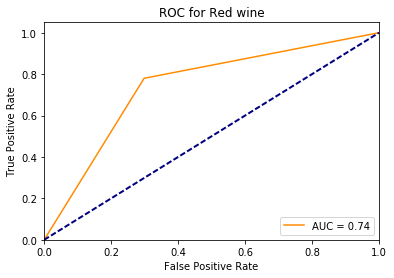

In [100]:
# Compute ROC curve and ROC area for each class
def draw_curve(title, y_test, y_preds):    
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    
draw_curve('ROC for White wine', y_test_white_2, y_score_white_2)
draw_curve('ROC for Red wine', y_test_red_2, y_score_red_2) 